<a href="https://colab.research.google.com/github/awalinrizky/mandiri6/blob/main/Mandiri6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# === 1. Import Library ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/praktikum_ml/praktikum06/data/data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# === 3. Cek Informasi Dataset ===
df.info()

print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())

print("\nJumlah Duplikat:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df = df.drop(columns=['id', 'Unnamed: 32'])

In [7]:
# === 5. Encode Label Diagnosis ===
# Kolom 'diagnosis' memiliki nilai M (malignant) dan B (benign)
# Ubah ke bentuk numerik agar bisa digunakan oleh model
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# 1 = Malignant, 0 = Benign
df['diagnosis'].value_counts()


,count
diagnosis,
0,357
1,212


In [8]:
# === 6. Pisahkan Fitur dan Label ===
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


In [9]:
# === 7. Split Data (Training dan Testing) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data training:", X_train.shape)
print("Jumlah data testing:", X_test.shape)


Jumlah data training: (455, 30)
Jumlah data testing: (114, 30)


In [10]:
# === 8. Standarisasi Data ===
# SVM sensitif terhadap skala fitur, jadi perlu dilakukan scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# === 9. Pembuatan dan Pelatihan Model SVM ===
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

Akurasi Model: 96.49 %


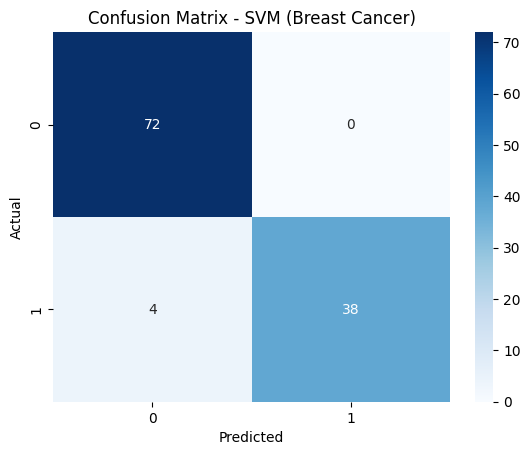


Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [12]:
# === 10. Evaluasi Model ===
y_pred = model.predict(X_test)

# Akurasi
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model:", round(acc*100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM (Breast Cancer)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


In [13]:
# === 11. Uji Prediksi Data Baru ===
# Contoh data acak (harus 30 fitur sesuai dataset)
sample = X_test[0].reshape(1, -1)
prediction = model.predict(sample)
print("Hasil prediksi:", "Malignant" if prediction[0] == 1 else "Benign")


Hasil prediksi: Benign
